In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-market/NSE-TATAGLOBAL.csv


# Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.options.display.float_format = '{:.2f}'.format
sns.set(rc={'figure.figsize':(20, 20)})

In [4]:
import sys
print("Python version: {}". format(sys.version))

import pandas as pd 
print("pandas version: {}". format(pd.__version__))

import matplotlib 
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np 
print("NumPy version: {}". format(np.__version__))

import scipy as sp 
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display 
print("IPython version: {}". format(IPython.__version__)) 

import sklearn 
print("scikit-learn version: {}". format(sklearn.__version__))

import keras
print("keras version: {}".format(keras.__version__))

import tensorflow as tf
print("tensorflow version: {}".format(tf.__version__))

Python version: 3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:40:32) [GCC 12.3.0]
pandas version: 2.0.3
matplotlib version: 3.7.4
NumPy version: 1.24.3
SciPy version: 1.11.4
IPython version: 8.14.0
scikit-learn version: 1.2.2
keras version: 2.13.1
tensorflow version: 2.13.0


# Load the stock market dataset

In [5]:
df = pd.read_csv("/kaggle/input/stock-market/NSE-TATAGLOBAL.csv")

# Explore the dataset

In [6]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [7]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


Display descriptive statistics of numerical columns

In [8]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.00,2035.00,2035.00,2035.00,2035.00,2035.00,2035.00
mean,149.71,151.99,147.29,149.47,149.45,2335681.40,3899.98
std,48.66,49.41,47.93,48.73,48.71,2091778.13,4570.77
min,81.10,82.80,80.00,81.00,80.95,39610.00,37.04
25%,120.03,122.10,118.30,120.07,120.05,1146444.50,1427.46
50%,141.50,143.40,139.60,141.10,141.25,1783456.00,2512.03
75%,157.18,159.40,155.15,156.93,156.90,2813594.00,4539.02
max,327.70,328.75,321.65,325.95,325.75,29191015.00,55755.08


Display descriptive statistics of all columns, including categorical ones

In [9]:
df.describe(include='all')

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035,2035.00,2035.00,2035.00,2035.00,2035.00,2035.00,2035.00
unique,2035,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2018-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,149.71,151.99,147.29,149.47,149.45,2335681.40,3899.98
std,NaN,48.66,49.41,47.93,48.73,48.71,2091778.13,4570.77
min,NaN,81.10,82.80,80.00,81.00,80.95,39610.00,37.04
25%,NaN,120.03,122.10,118.30,120.07,120.05,1146444.50,1427.46
50%,NaN,141.50,143.40,139.60,141.10,141.25,1783456.00,2512.03
75%,NaN,157.18,159.40,155.15,156.93,156.90,2813594.00,4539.02


Display information about the DataFrame

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [11]:
df.shape

(2035, 8)

In [12]:
df.Date = pd.to_datetime(df.Date)

In [13]:
df.describe()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035,2035.00,2035.00,2035.00,2035.00,2035.00,2035.00,2035.00
mean,2014-08-20 14:43:06.339066112,149.71,151.99,147.29,149.47,149.45,2335681.40,3899.98
min,2010-07-21 00:00:00,81.10,82.80,80.00,81.00,80.95,39610.00,37.04
25%,2012-07-28 12:00:00,120.03,122.10,118.30,120.07,120.05,1146444.50,1427.46
50%,2014-08-14 00:00:00,141.50,143.40,139.60,141.10,141.25,1783456.00,2512.03
75%,2016-09-10 12:00:00,157.18,159.40,155.15,156.93,156.90,2813594.00,4539.02
max,2018-09-28 00:00:00,327.70,328.75,321.65,325.95,325.75,29191015.00,55755.08
std,NaN,48.66,49.41,47.93,48.73,48.71,2091778.13,4570.77


We have some information missing in the dataset. Let's look into it and figure out how to fill in the gaps

In [14]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

The 'Open' column has the most missing values. Let's identify the rows where these values are not present

In [15]:
df[df.Open.isnull()]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)


In [16]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')


In [17]:
df["Date"] = pd.to_datetime(df["Date"])

In [18]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")

df=df[::-1#].reset_index().drop(columns=["index"])

In [19]:
df["Date"]=pd.to_datetime(df["Date"],unit="s")
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [20]:
df1=df.reset_index()['Close']
df11=pd.to_datetime(df["Date"])

In [21]:
df11

0      2018-09-28
1      2018-09-27
2      2018-09-26
3      2018-09-25
4      2018-09-24
          ...    
2030   2010-07-27
2031   2010-07-26
2032   2010-07-23
2033   2010-07-22
2034   2010-07-21
Name: Date, Length: 2035, dtype: datetime64[ns]

It seems like you are assigning the variable dgp to the DataFrame df1 in a programming context. If you intend to display the contents of the DataFrame dgp

In [22]:
dgp=df1

dgp

0      233.75
1      233.25
2      234.25
3      236.10
4      233.30
        ...  
2030   118.65
2031   117.60
2032   120.65
2033   120.90
2034   121.55
Name: Close, Length: 2035, dtype: float64

In [23]:
import plotly.graph_objects as go

fig=go.Figure(data=go.Scatter(x=df11,y=df1,mode="lines",marker_color="seagreen"))
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(title="Stock")
fig.show()

LSTM models can be influenced by the range of values in the data, so we use MinMax scaler to adjust the scale

In [24]:
import numpy as np

In [25]:
df1

0      233.75
1      233.25
2      234.25
3      236.10
4      233.30
        ...  
2030   118.65
2031   117.60
2032   120.65
2033   120.90
2034   121.55
Name: Close, Length: 2035, dtype: float64

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [27]:
print(df1)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


Dividing the dataset into two parts: one for training and the other for testing

In [28]:
training_size=int(len(df1)*0.85)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [29]:
training_size,test_size

(1729, 306)

In [30]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.02920752],
       [0.02328431],
       [0.01919935]])

convert an array of values into a dataset matrix

In [31]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

reshape into X=t,t+1,t+2,t+3 and Y=t+4

In [32]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [33]:
print(X_train.shape), print(y_train.shape)

(1628, 100)
(1628,)


(None, None)

Change the input format to [groups of data, time sequence, characteristics], as needed for LSTM

In [34]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Create the Stocked LSTM model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU

In [36]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
#model.add(LSTM(50,return_sequences=True))
model.add(GRU(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 gru (GRU)                   (None, 100, 50)           15300     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 66151 (258.40 KB)
Trainable params: 66151 (258.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 gru (GRU)                   (None, 100, 50)           15300     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 66151 (258.40 KB)
Trainable params: 66151 (258.40 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=200,batch_size=64,verbose=1)

Epoch 1/200
26/26 [==============================] - 16s 285ms/step - loss: 0.0191 - val_loss: 5.7426e-04
Epoch 2/200
26/26 [==============================] - 5s 208ms/step - loss: 0.0021 - val_loss: 6.1775e-04
Epoch 3/200
26/26 [==============================] - 6s 217ms/step - loss: 0.0016 - val_loss: 5.0074e-04
Epoch 4/200
26/26 [==============================] - 6s 213ms/step - loss: 0.0014 - val_loss: 5.1673e-04
Epoch 5/200
26/26 [==============================] - 6s 218ms/step - loss: 0.0014 - val_loss: 4.5231e-04
Epoch 6/200
26/26 [==============================] - 5s 207ms/step - loss: 0.0012 - val_loss: 4.0890e-04
Epoch 7/200
26/26 [==============================] - 5s 207ms/step - loss: 0.0011 - val_loss: 4.1916e-04
Epoch 8/200
26/26 [==============================] - 6s 215ms/step - loss: 0.0010 - val_loss: 3.9464e-04
Epoch 9/200
26/26 [==============================] - 6s 215ms/step - loss: 9.8801e-04 - val_loss: 3.7274e-04
Epoch 10/200
26/26 [==============================

In [40]:
import tensorflow as tf

In [41]:
import os 
aa=os.listdir()
aa

['__notebook__.ipynb']

In [42]:
tf.__version__

'2.13.0'

Let's make predictions and assess how well we did


In [43]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

7/7 [==============================] - 0s 49ms/step


Change back to how it was before

In [44]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

Find the Root Mean Square Error to measure how well something is performing


In [45]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

156.60026313176152

Root Mean Square Error for Test Data

In [46]:
math.sqrt(mean_squared_error(ytest,test_predict))

111.41102497462596

shift train predictions for plotting


In [47]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions

Flatten arrays

In [48]:
trPP=trainPredictPlot.ravel()
tePP=testPredictPlot.ravel()
bc={"Date":df11.ravel(),"Main":dgp.ravel(),"Train":trPP,"Test":tePP}
bc=pd.DataFrame(data=bc)
bc

,Date,Main,Train,Test
0,2018-09-28,233.75,NaN,NaN
1,2018-09-27,233.25,NaN,NaN
2,2018-09-26,234.25,NaN,NaN
3,2018-09-25,236.10,NaN,NaN
4,2018-09-24,233.30,NaN,NaN
...,...,...,...,...
2030,2010-07-27,118.65,NaN,117.75
2031,2010-07-26,117.60,NaN,118.48
2032,2010-07-23,120.65,NaN,117.80
2033,2010-07-22,120.90,NaN,120.09


In [49]:
bc.to_csv("TestingData.csv")

In [50]:
!pip install plotly

In [51]:
bc["Date"]=pd.to_datetime(bc["Date"])

In [52]:
len(trainPredictPlot)

2035

In [53]:
len(test_data)

306

In [54]:
x_input=test_data[-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [55]:
df11

0      2018-09-28
1      2018-09-27
2      2018-09-26
3      2018-09-25
4      2018-09-24
          ...    
2030   2010-07-27
2031   2010-07-26
2032   2010-07-23
2033   2010-07-22
2034   2010-07-21
Name: Date, Length: 2035, dtype: datetime64[ns]

In [56]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

demonstrate prediction for next 10 days

In [57]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.16550526]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0

In [58]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [59]:
import matplotlib.pyplot as plt

In [60]:
len(df1)

2035

In [61]:
pllt=scaler.inverse_transform(df1[-100:]).tolist()
pllt.extend(scaler.inverse_transform(lst_output).tolist())
jlk=[]
for i in pllt:
  jlk.append(i[0])

jlk

[111.5,
 114.85,
 115.25,
 114.95,
 114.1,
 115.25,
 114.75,
 112.95,
 112.95,
 112.45,
 109.95,
 116.8,
 117.2,
 119.9,
 120.1,
 119.6,
 121.2,
 124.75000000000001,
 124.84999999999998,
 128.1,
 131.9,
 127.4,
 125.15,
 125.59999999999998,
 124.29999999999998,
 124.54999999999998,
 125.15,
 124.54999999999998,
 124.65,
 128.95,
 127.25,
 127.35000000000001,
 128.45,
 128.55,
 130.4,
 129.35,
 129.75,
 129.6,
 129.85,
 133.05,
 133.75,
 131.0,
 134.25,
 132.6,
 133.4,
 129.3,
 127.0,
 124.65,
 123.49999999999999,
 120.2,
 121.5,
 122.85,
 123.6,
 125.09999999999998,
 123.54999999999998,
 120.8,
 122.49999999999999,
 124.54999999999998,
 122.64999999999999,
 122.15,
 123.24999999999999,
 123.90000000000002,
 125.95,
 127.8,
 127.25,
 127.7,
 123.15000000000002,
 122.15,
 122.39999999999999,
 122.99999999999999,
 120.5,
 117.6,
 117.75,
 118.15,
 117.0,
 116.45,
 116.7,
 111.5,
 113.05,
 108.85,
 110.1,
 111.25,
 114.15,
 112.55,
 113.9,
 112.3,
 112.85,
 112.1,
 114.05,
 116.5,
 118.3,


In [62]:
pllt=pd.Series(jlk)
pllt.to_csv("Extended.csv")

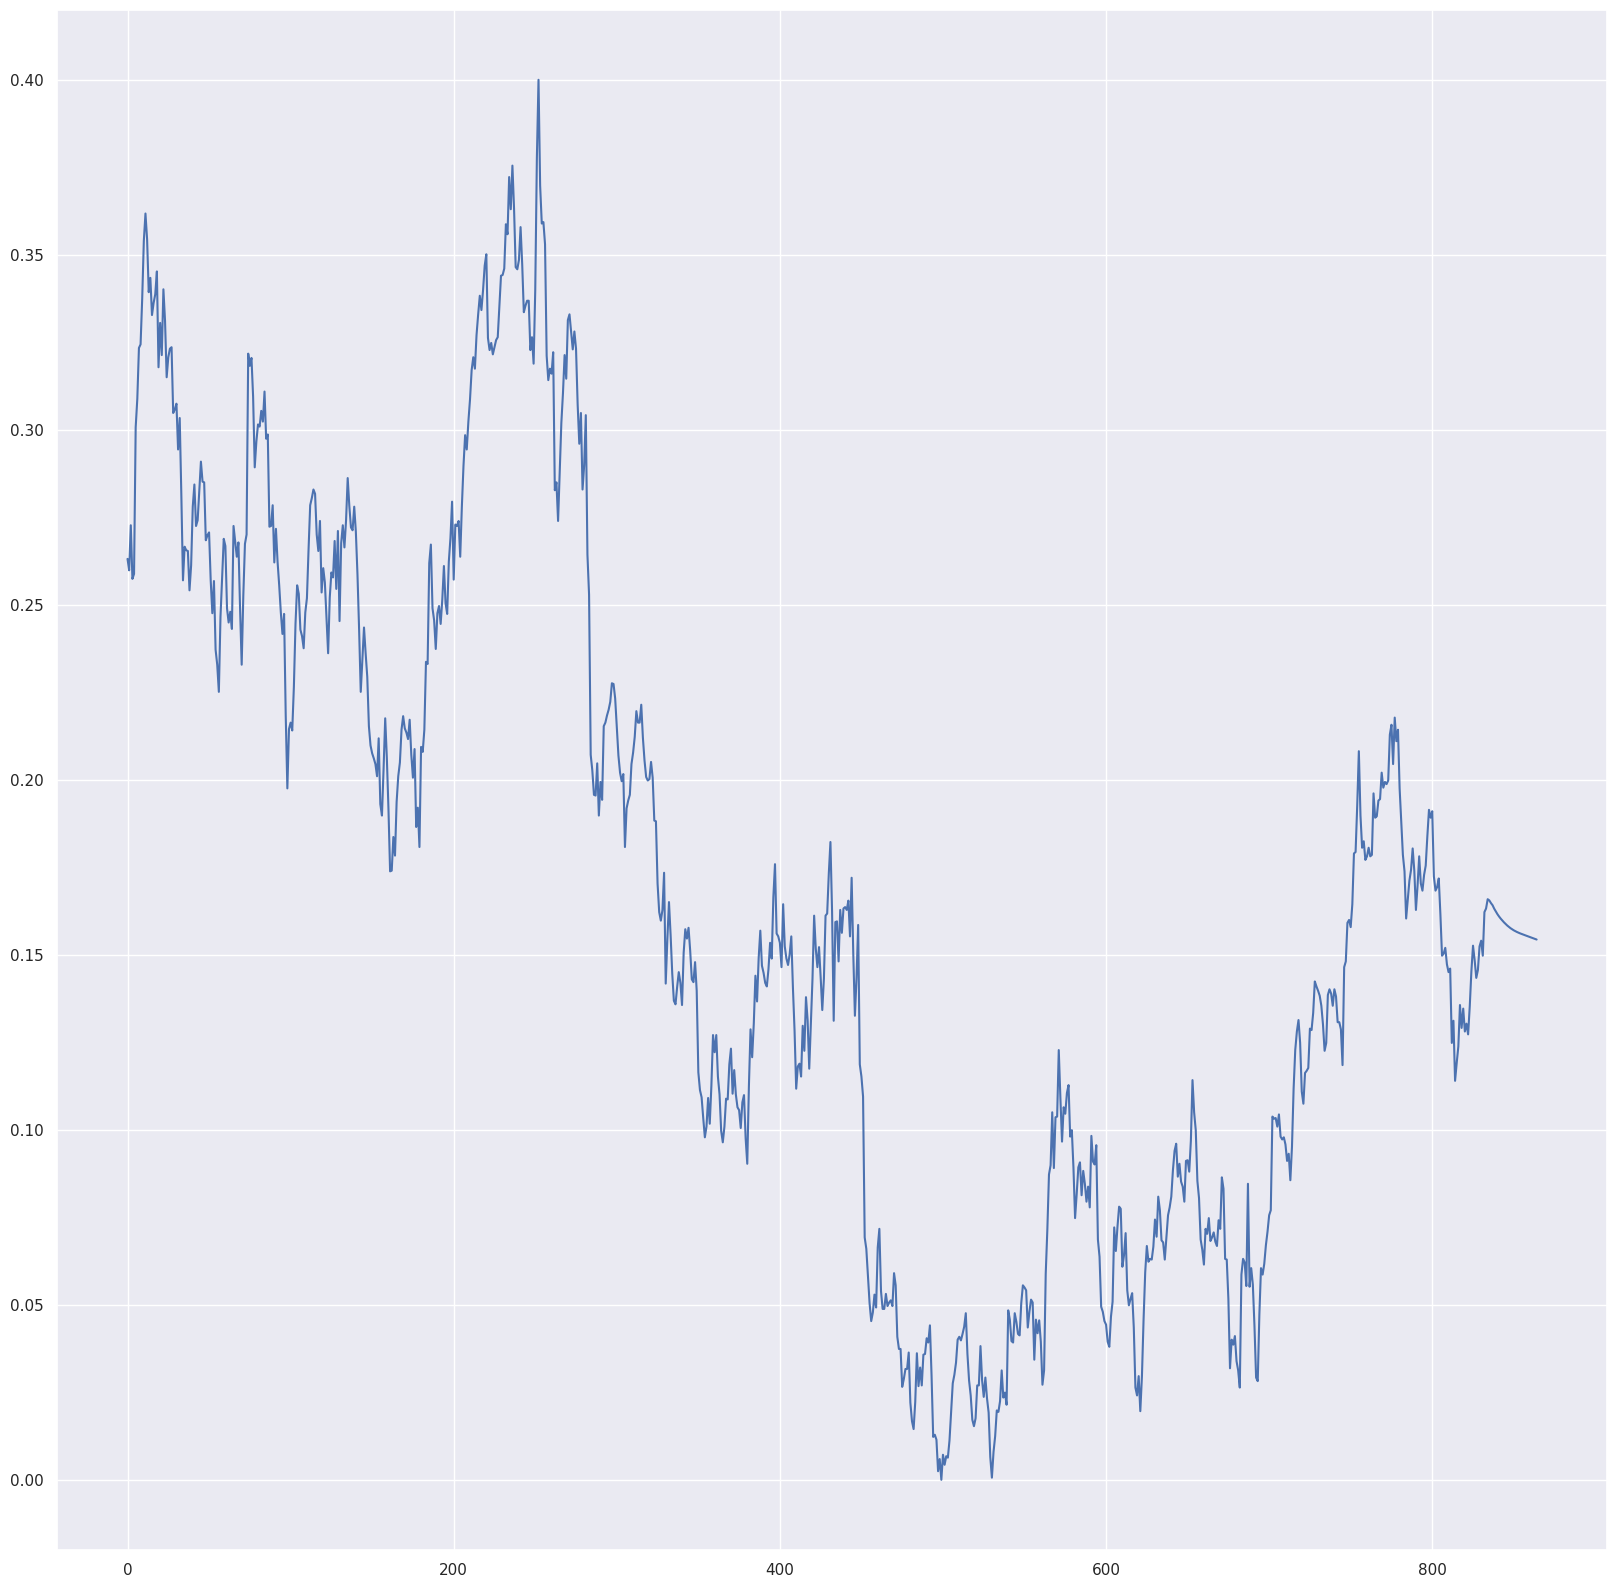

In [63]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [64]:
df3=scaler.inverse_transform(df3).tolist()

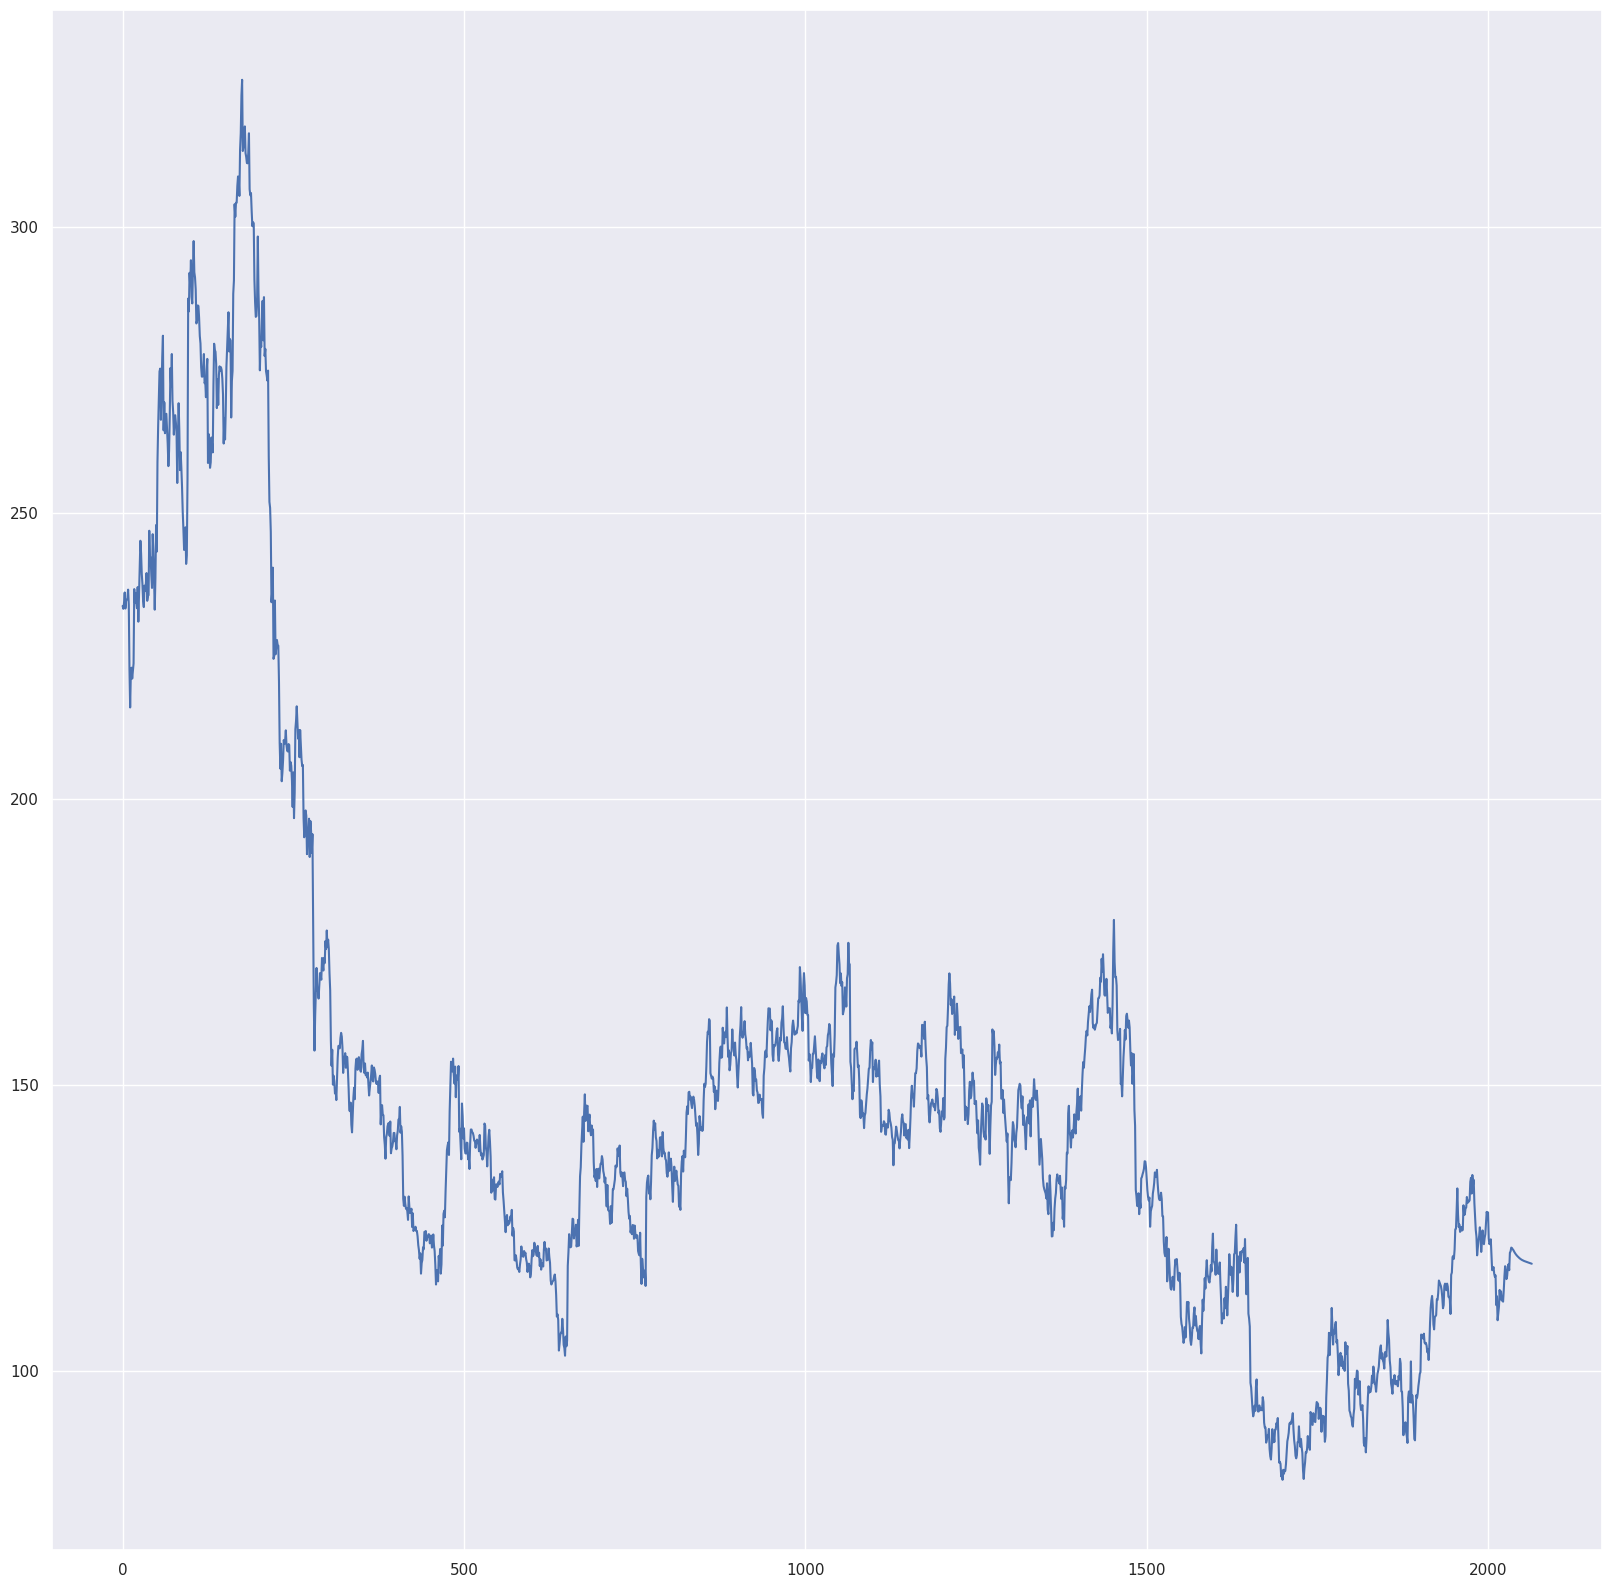

In [65]:
plt.plot(df3)

In [66]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Sample data creation
data = {'Date': pd.date_range(start='2023-01-01', periods=200, freq='D'),
        'Close': np.random.rand(200)}
testt = pd.DataFrame(data)

# Assuming you have already defined and trained your model
# model = ...

# Assuming 'Date' and 'Close' columns are present in your test data
testt["Date"] = pd.to_datetime(testt['Date'], unit='s')
testt1 = testt["Close"][-100:]

scaler = MinMaxScaler(feature_range=(0, 1))
testt1 = scaler.fit_transform(np.array(testt1).reshape(-1, 1))

# Assuming you have already defined and trained your model
# model = ...

def turn(testt1):
    x_input = testt1.reshape(1, -1)
    x_input = x_input.reshape((1, 100, 1))
    yhat = model.predict(x_input, verbose=0)
    yhat = scaler.inverse_transform(yhat)
    print("{} minute output".format(yhat))
    return yhat

iop = []
yo = turn(testt1)
iop.append(yo)

# Use np.concatenate to append the prediction to the array
yo = np.array(yo[0][0])
testt1 = np.concatenate((testt1, yo), axis=None)
testt1 = testt1[1:]  # Remove the first element
yo = turn(testt1)
iop.append(yo)


[[0.749174]] minute output
[[0.7355615]] minute output


In [68]:
yhat=pd.Series(np.ravel(iop))

In [69]:
import pandas as pd
df2 = pd.DataFrame()
df2 = pd.concat([df2, yhat], ignore_index=True)

In [70]:
df2

,0
0,0.75
1,0.74


In [71]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Create a DataFrame with random data for demonstration purposes
data = {'column1': np.random.rand(102), 'column2': np.random.rand(102)}
df12 = pd.DataFrame(data)

ann = df12.iloc[-100:]
ann = pd.date_range(start='2023-01-01', periods=102, freq='5T')
ann


DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 00:05:00',
               '2023-01-01 00:10:00', '2023-01-01 00:15:00',
               '2023-01-01 00:20:00', '2023-01-01 00:25:00',
               '2023-01-01 00:30:00', '2023-01-01 00:35:00',
               '2023-01-01 00:40:00', '2023-01-01 00:45:00',
               ...
               '2023-01-01 07:40:00', '2023-01-01 07:45:00',
               '2023-01-01 07:50:00', '2023-01-01 07:55:00',
               '2023-01-01 08:00:00', '2023-01-01 08:05:00',
               '2023-01-01 08:10:00', '2023-01-01 08:15:00',
               '2023-01-01 08:20:00', '2023-01-01 08:25:00'],
              dtype='datetime64[ns]', length=102, freq='5T')

In [72]:
import plotly.graph_objects as go

fig=go.Figure(data=go.Scatter(x=ann,y=df2,mode="lines",marker_color="seagreen"))
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(title="Stock")
fig.show()

In [73]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [74]:
nop=int(input("Enter the Number in csv :"))

StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.